In [12]:
%pip install yfinance
%pip install plotly
%pip install numpy
%pip install statsmodels
%pip install pandas
%pip install vectorbt
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import vectorbt as vbt
import seaborn as sns

In [11]:
ticker = "PETR4.SA"
petr4 = yf.Ticker(ticker)
petr4_adj_close = petr4.history(period="max")["Close"]
petr4_dividend = petr4.dividends
adj_close_df = pd.DataFrame(petr4_adj_close, columns=["Close"])
dividend_df = pd.DataFrame(petr4_dividend, columns=["Dividends"])
df_final = pd.concat([adj_close_df, dividend_df], axis=1)
df_final['Dividends'].fillna(0.0, inplace=True)
df_final

,Close,Dividends
Date,,
2000-01-03 00:00:00-02:00,1.563741,0.0
2000-01-04 00:00:00-02:00,1.477236,0.0
2000-01-05 00:00:00-02:00,1.462330,0.0
2000-01-06 00:00:00-02:00,1.457272,0.0
2000-01-07 00:00:00-02:00,1.463927,0.0
...,...,...
2023-07-31 00:00:00-03:00,31.110001,0.0
2023-08-01 00:00:00-03:00,30.600000,0.0
2023-08-02 00:00:00-03:00,30.530001,0.0


In [16]:
dividendos_petr4 = vbt.YFData.download('PETR4.SA').get(['Close', 'Dividends'])
dividendos_petr4

,Close,Dividends
Date,,
2000-01-03 02:00:00+00:00,1.563740,0.0
2000-01-04 02:00:00+00:00,1.477236,0.0
2000-01-05 02:00:00+00:00,1.462330,0.0
2000-01-06 02:00:00+00:00,1.457273,0.0
2000-01-07 02:00:00+00:00,1.463927,0.0
...,...,...
2023-07-31 03:00:00+00:00,31.110001,0.0
2023-08-01 03:00:00+00:00,30.600000,0.0
2023-08-02 03:00:00+00:00,30.530001,0.0


In [17]:
dividendos_petr4['soma_dividendos'] = dividendos_petr4.Dividends.rolling('365D').sum()
dividendos_petr4

,Close,Dividends,soma_dividendos
Date,,,
2000-01-03 02:00:00+00:00,1.563740,0.0,0.000000
2000-01-04 02:00:00+00:00,1.477236,0.0,0.000000
2000-01-05 02:00:00+00:00,1.462330,0.0,0.000000
2000-01-06 02:00:00+00:00,1.457273,0.0,0.000000
2000-01-07 02:00:00+00:00,1.463927,0.0,0.000000
...,...,...,...
2023-07-31 03:00:00+00:00,31.110001,0.0,14.844972
2023-08-01 03:00:00+00:00,30.600000,0.0,14.844972
2023-08-02 03:00:00+00:00,30.530001,0.0,14.844972


<Axes: xlabel='Date'>

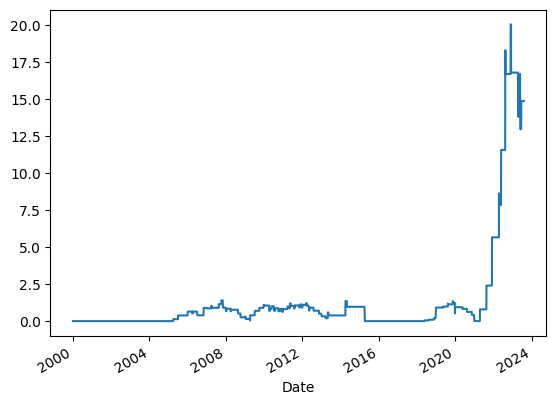

In [18]:
dividendos_petr4.soma_dividendos.plot()

In [19]:
dividendos_petr4['DY'] = dividendos_petr4['soma_dividendos']/dividendos_petr4['Close'] * 100
dividendos_petr4

,Close,Dividends,soma_dividendos,DY
Date,,,,
2000-01-03 02:00:00+00:00,1.563740,0.0,0.000000,0.000000
2000-01-04 02:00:00+00:00,1.477236,0.0,0.000000,0.000000
2000-01-05 02:00:00+00:00,1.462330,0.0,0.000000,0.000000
2000-01-06 02:00:00+00:00,1.457273,0.0,0.000000,0.000000
2000-01-07 02:00:00+00:00,1.463927,0.0,0.000000,0.000000
...,...,...,...,...
2023-07-31 03:00:00+00:00,31.110001,0.0,14.844972,47.717685
2023-08-01 03:00:00+00:00,30.600000,0.0,14.844972,48.512980
2023-08-02 03:00:00+00:00,30.530001,0.0,14.844972,48.624211


In [21]:
dy_petr4 = dividendos_petr4[dividendos_petr4['Dividends']!=0]
dy_petr4

,Close,Dividends,soma_dividendos,DY
Date,,,,
2005-04-01 03:00:00+00:00,3.492971,0.133288,0.133288,3.815892
2005-07-01 03:00:00+00:00,3.706465,0.250663,0.383951,10.358955
2006-01-02 02:00:00+00:00,5.293367,0.259000,0.642951,12.146351
2006-04-04 03:00:00+00:00,6.052313,0.132700,0.642363,10.613512
2006-11-01 03:00:00+00:00,6.076027,0.500750,0.892450,14.688052
2007-01-02 02:00:00+00:00,7.268165,0.225000,0.858450,11.811097
2007-04-03 03:00:00+00:00,6.606323,0.175000,1.033450,15.643347
2007-08-20 03:00:00+00:00,6.807630,0.251700,1.152450,16.928799
2007-10-08 03:00:00+00:00,9.177964,0.256500,1.408950,15.351444


<Axes: xlabel='Date'>

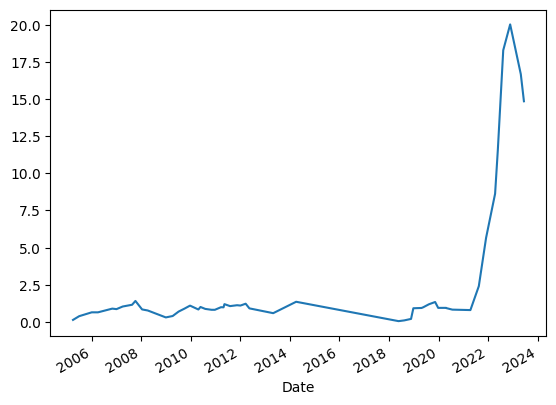

In [22]:
dy_petr4.soma_dividendos.plot()

In [23]:
dy_petr4['DY'] = dy_petr4['soma_dividendos']/dy_petr4['Close'] * 100
dy_petr4

C:\Users\wpsilva\AppData\Local\Temp\ipykernel_24636\1784016575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dy_petr4['DY'] = dy_petr4['soma_dividendos']/dy_petr4['Close'] * 100


,Close,Dividends,soma_dividendos,DY
Date,,,,
2005-04-01 03:00:00+00:00,3.492971,0.133288,0.133288,3.815892
2005-07-01 03:00:00+00:00,3.706465,0.250663,0.383951,10.358955
2006-01-02 02:00:00+00:00,5.293367,0.259000,0.642951,12.146351
2006-04-04 03:00:00+00:00,6.052313,0.132700,0.642363,10.613512
2006-11-01 03:00:00+00:00,6.076027,0.500750,0.892450,14.688052
2007-01-02 02:00:00+00:00,7.268165,0.225000,0.858450,11.811097
2007-04-03 03:00:00+00:00,6.606323,0.175000,1.033450,15.643347
2007-08-20 03:00:00+00:00,6.807630,0.251700,1.152450,16.928799
2007-10-08 03:00:00+00:00,9.177964,0.256500,1.408950,15.351444


<Axes: xlabel='Date'>

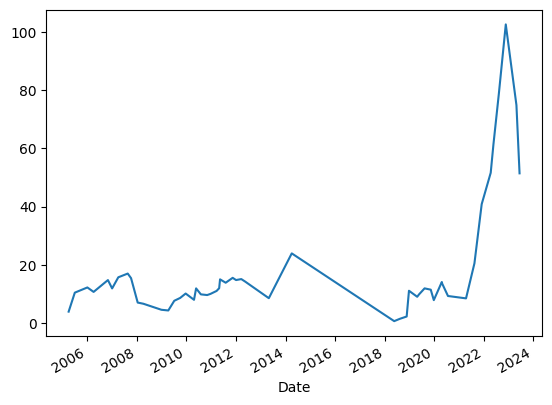

In [24]:
dy_petr4.DY.plot()

In [25]:
np.mean(dy_petr4.DY)

18.152643702595444

In [30]:
np.median(dy_petr4.DY)

11.595931601948058

d:\dev\TCD\Estatistica_Mercado_Financeiro\estats_mercado\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


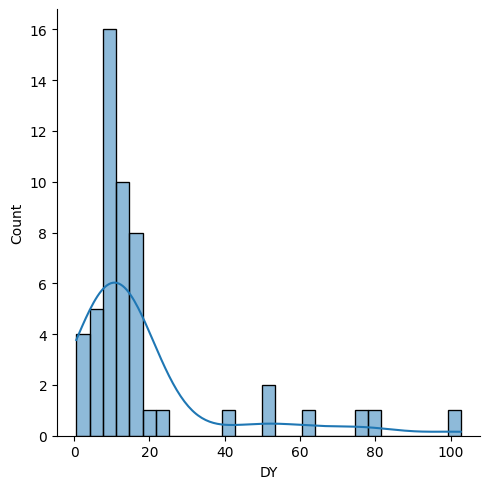

In [31]:
sns.displot(dy_petr4.DY, kde=True)

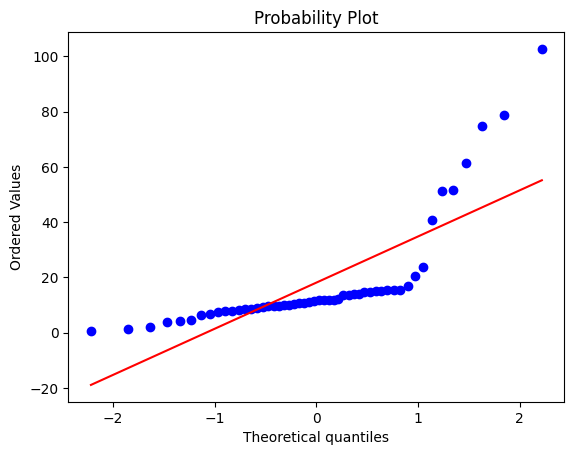

In [33]:
stats.probplot(dy_petr4.DY, dist='norm', plot=plt)
plt.show()

Existe uma relação entre preço da ação e o dividenedo? Preço maior = Dividendo Maior?

In [35]:
fig01 = px.scatter(x=dy_petr4.Close, y=dy_petr4.DY, width=500)
fig01.show()

Teste de corr

In [40]:
corr, p = stats.pearsonr(dy_petr4.Close, dy_petr4.DY)
print('Correlação, r=%.3f' %corr, 'p=%.3f' %p)

Correlação, r=0.786 p=0.000


In [41]:
corr, p = stats.spearmanr(dy_petr4.Close, dy_petr4.DY)
print('Correlação, r=%.3f' %corr, 'p=%.3f' %p)

Correlação, r=0.108 p=0.447
